**Project Title**

Natural Disaster Prediction & Early Warning System

**Problem Satement**

Earthquakes are unpredictable natural disasters that cause severe loss of life and property worldwide. Despite continuous monitoring, the absence of reliable prediction and early warning systems limits disaster preparedness and risk management. There is a strong need to analyze historical seismic data to identify trends and patterns that can contribute toward building data-driven disaster prediction and early warning systems.

**Description**

This project focuses on analyzing earthquake data to identify trends and patterns that may assist in disaster prediction and early warning systems. It uses a dataset includes a record of the date, time, location, depth, magnitude, and source of every earthquake with a reported magnitude 5.5 or higher since 1965.

Context About Dataset

The National Earthquake Information Center (NEIC) determines the location and size of all significant earthquakes that occur worldwide and disseminates this information immediately to national and international agencies, scientists, critical facilities, and the general public. The NEIC compiles and provides to scientists and to the public an extensive seismic database that serves as a foundation for scientific research through the operation of modern digital national and global seismograph networks and cooperative international agreements. The NEIC is the national data center and archive for earthquake information.

This dataset serves as the foundation for our project’s analysis, enabling the application of AI/ML techniques for natural disaster prediction and early warning insights.

In [67]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [13]:
#load dataset
df=pd.read_csv("/content/dbEarthquake.csv")
#display first 5 rows
df.head()

Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01-02-1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01-04-1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01-05-1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  01-08-1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  01-09-1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0                     NaN        6.0             MW  ...   
1                     NaN        5.8             MW  ...   
2                     NaN        6.2             MW  ...   
3                     NaN        5.8             MW  ...   
4                     NaN        5.8             MW  ...   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                         NaN            NaN                  NaN   
2                         NaN            NaN                  NaN   
3                         NaN            NaN                  NaN   
4                         NaN            NaN                  NaN   

   Horizontal Error  Root Mean Square            ID  Source Location Source  \
0               NaN               NaN  ISCGEM860706  ISCGEM          ISCGEM   
1               NaN               NaN  ISCGEM860737  ISCGEM          ISCGEM   
2               NaN               NaN  ISCGEM860762  ISCGEM          ISCGEM   
3               NaN               NaN  ISCGEM860856  ISCGEM          ISCGEM   
4               NaN               NaN  ISCGEM860890  ISCGEM          ISCGEM   

  Magnitude Source     Status  
0           ISCGEM  Automatic  
1           ISCGEM  Automatic  
2           ISCGEM  Automatic  
3           ISCGEM  Automatic  
4           ISCGEM  Automatic  

[5 rows x 21 columns]

In [14]:
#display last 5 rows
df.tail()

Date      Time  Latitude  Longitude        Type  Depth  \
23407  12/28/2016  08:22:12   38.3917  -118.8941  Earthquake  12.30   
23408  12/28/2016  09:13:47   38.3777  -118.8957  Earthquake   8.80   
23409  12/28/2016  12:38:51   36.9179   140.4262  Earthquake  10.00   
23410  12/29/2016  22:30:19   -9.0283   118.6639  Earthquake  79.00   
23411  12/30/2016  20:08:28   37.3973   141.4103  Earthquake  11.94   

       Depth Error  Depth Seismic Stations  Magnitude Magnitude Type  ...  \
23407          1.2                    40.0        5.6             ML  ...   
23408          2.0                    33.0        5.5             ML  ...   
23409          1.8                     NaN        5.9            MWW  ...   
23410          1.8                     NaN        6.3            MWW  ...   
23411          2.2                     NaN        5.5             MB  ...   

       Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
23407                        18.0          42.47                0.120   
23408                        18.0          48.58                0.129   
23409                         NaN          91.00                0.992   
23410                         NaN          26.00                3.553   
23411                       428.0          97.00                0.681   

       Horizontal Error  Root Mean Square          ID Source Location Source  \
23407               NaN            0.1898  NN00570710     NN              NN   
23408               NaN            0.2187  NN00570744     NN              NN   
23409               4.8            1.5200  US10007NAF     US              US   
23410               6.0            1.4300  US10007NL0     US              US   
23411               4.5            0.9100  US10007NTD     US              US   

      Magnitude Source    Status  
23407               NN  Reviewed  
23408               NN  Reviewed  
23409               US  Reviewed  
23410               US  Reviewed  
23411               US  Reviewed  

[5 rows x 21 columns]

In [4]:
df.head(10)

Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01-02-1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01-04-1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01-05-1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  01-08-1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  01-09-1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   
5  01-10-1965  13:36:32   -13.405    166.629  Earthquake   35.0          NaN   
6  01-12-1965  13:32:25    27.357     87.867  Earthquake   20.0          NaN   
7  01/15/1965  23:17:42   -13.309    166.212  Earthquake   35.0          NaN   
8  01/16/1965  11:32:37   -56.452    -27.043  Earthquake   95.0          NaN   
9  01/17/1965  10:43:17   -24.563    178.487  Earthquake  565.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0                     NaN        6.0             MW  ...   
1                     NaN        5.8             MW  ...   
2                     NaN        6.2             MW  ...   
3                     NaN        5.8             MW  ...   
4                     NaN        5.8             MW  ...   
5                     NaN        6.7             MW  ...   
6                     NaN        5.9             MW  ...   
7                     NaN        6.0             MW  ...   
8                     NaN        6.0             MW  ...   
9                     NaN        5.8             MW  ...   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                         NaN            NaN                  NaN   
2                         NaN            NaN                  NaN   
3                         NaN            NaN                  NaN   
4                         NaN            NaN                  NaN   
5                         NaN            NaN                  NaN   
6                         NaN            NaN                  NaN   
7                         NaN            NaN                  NaN   
8                         NaN            NaN                  NaN   
9                         NaN            NaN                  NaN   

   Horizontal Error  Root Mean Square               ID     Source  \
0               NaN               NaN     ISCGEM860706     ISCGEM   
1               NaN               NaN     ISCGEM860737     ISCGEM   
2               NaN               NaN     ISCGEM860762     ISCGEM   
3               NaN               NaN     ISCGEM860856     ISCGEM   
4               NaN               NaN     ISCGEM860890     ISCGEM   
5               NaN               NaN     ISCGEM860922     ISCGEM   
6               NaN               NaN     ISCGEM861007     ISCGEM   
7               NaN               NaN     ISCGEM861111     ISCGEM   
8               NaN               NaN  ISCGEMSUP861125  ISCGEMSUP   
9               NaN               NaN     ISCGEM861148     ISCGEM   

  Location Source Magnitude Source     Status  
0          ISCGEM           ISCGEM  Automatic  
1          ISCGEM           ISCGEM  Automatic  
2          ISCGEM           ISCGEM  Automatic  
3          ISCGEM           ISCGEM  Automatic  
4          ISCGEM           ISCGEM  Automatic  
5          ISCGEM           ISCGEM  Automatic  
6          ISCGEM           ISCGEM  Automatic  
7          ISCGEM           ISCGEM  Automatic  
8          ISCGEM           ISCGEM  Automatic  
9          ISCGEM           ISCGEM  Automatic  

[10 rows x 21 columns]

In [5]:
#explore and understand the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [6]:
#Statistics of the dataset
df.describe()

Latitude     Longitude         Depth  Depth Error  \
count  23412.000000  23412.000000  23412.000000  4461.000000   
mean       1.679033     39.639961     70.767911     4.993115   
std       30.113183    125.511959    122.651898     4.875184   
min      -77.080000   -179.997000     -1.100000     0.000000   
25%      -18.653000    -76.349750     14.522500     1.800000   
50%       -3.568500    103.982000     33.000000     3.500000   
75%       26.190750    145.026250     54.000000     6.300000   
max       86.005000    179.998000    700.000000    91.295000   

       Depth Seismic Stations     Magnitude  Magnitude Error  \
count             7097.000000  23412.000000       327.000000   
mean               275.364098      5.882531         0.071820   
std                162.141631      0.423066         0.051466   
min                  0.000000      5.500000         0.000000   
25%                146.000000      5.600000         0.046000   
50%                255.000000      5.700000         0.059000   
75%                384.000000      6.000000         0.075500   
max                934.000000      9.100000         0.410000   

       Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
count                 2564.000000    7299.000000          1604.000000   
mean                    48.944618      44.163532             3.992660   
std                     62.943106      32.141486             5.377262   
min                      0.000000       0.000000             0.004505   
25%                     10.000000      24.100000             0.968750   
50%                     28.000000      36.000000             2.319500   
75%                     66.000000      54.000000             4.724500   
max                    821.000000     360.000000            37.874000   

       Horizontal Error  Root Mean Square  
count       1156.000000      17352.000000  
mean           7.662759          1.022784  
std           10.430396          0.188545  
min            0.085000          0.000000  
25%            5.300000          0.900000  
50%            6.700000          1.000000  
75%            8.100000          1.130000  
max           99.000000          3.440000

**Preprocessing**

In [7]:
#Find the missing value
df.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [9]:
#Rows & Columns
df.shape

(23412, 21)

In [10]:
#columns
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

**EDA(Exploratory Data Analysis)**

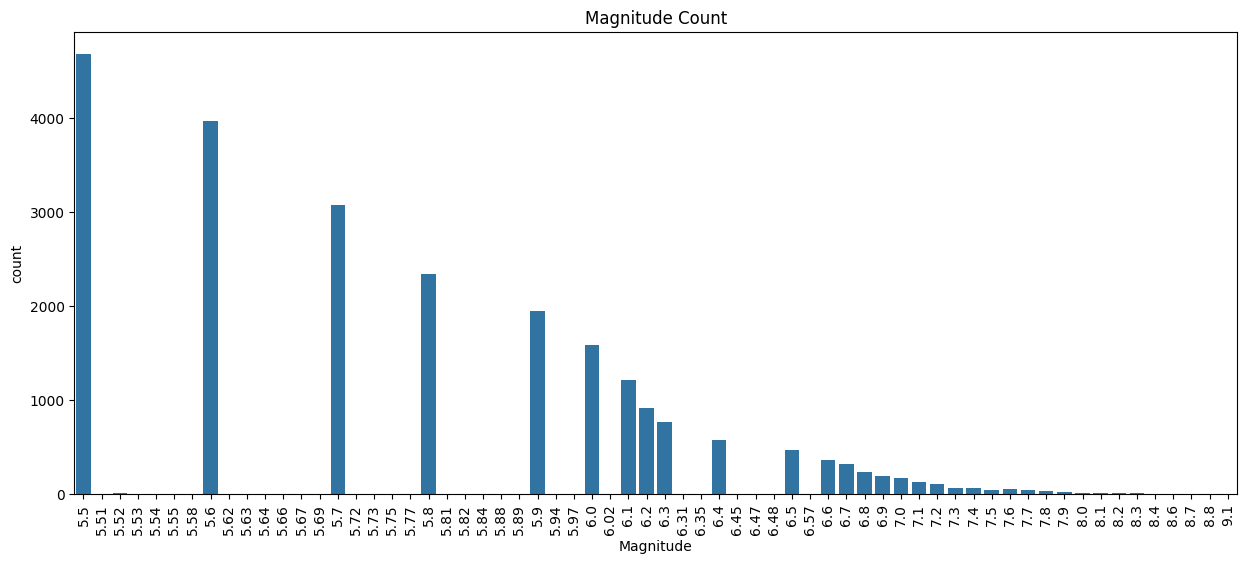

In [23]:
#Univariate Analysis
plt.figure(figsize=(15,6))#15 inches wide & 6 inches tall
plt.xticks(rotation=90)#rotate x-labels by 90 degrees
sns.countplot(x='Magnitude',data=df)
plt.title('Magnitude Count')
plt.show()

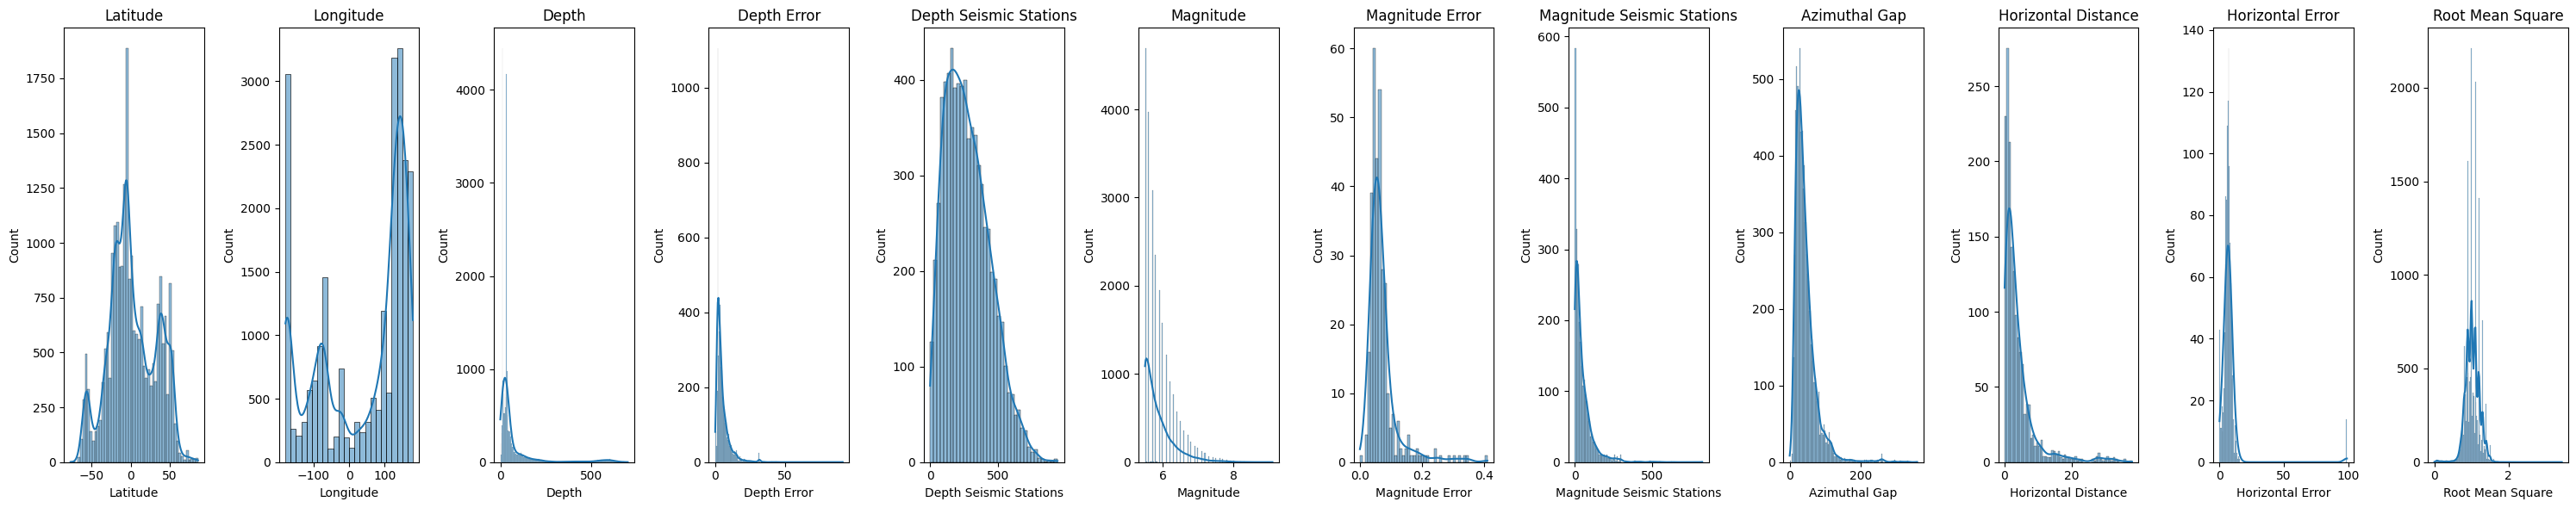

In [40]:
num_cols=['Latitude','Longitude','Depth','Depth Error','Depth Seismic Stations','Magnitude','Magnitude Error','Magnitude Seismic Stations','Azimuthal Gap','Horizontal Distance','Horizontal Error','Root Mean Square']
fig, axes=plt.subplots(1,12,figsize=(30,6))
for ax, col in zip(axes, num_cols):
  sns.histplot(df[col], kde=True, ax=ax)
  ax.set_title(col)
plt.tight_layout()
plt.show()

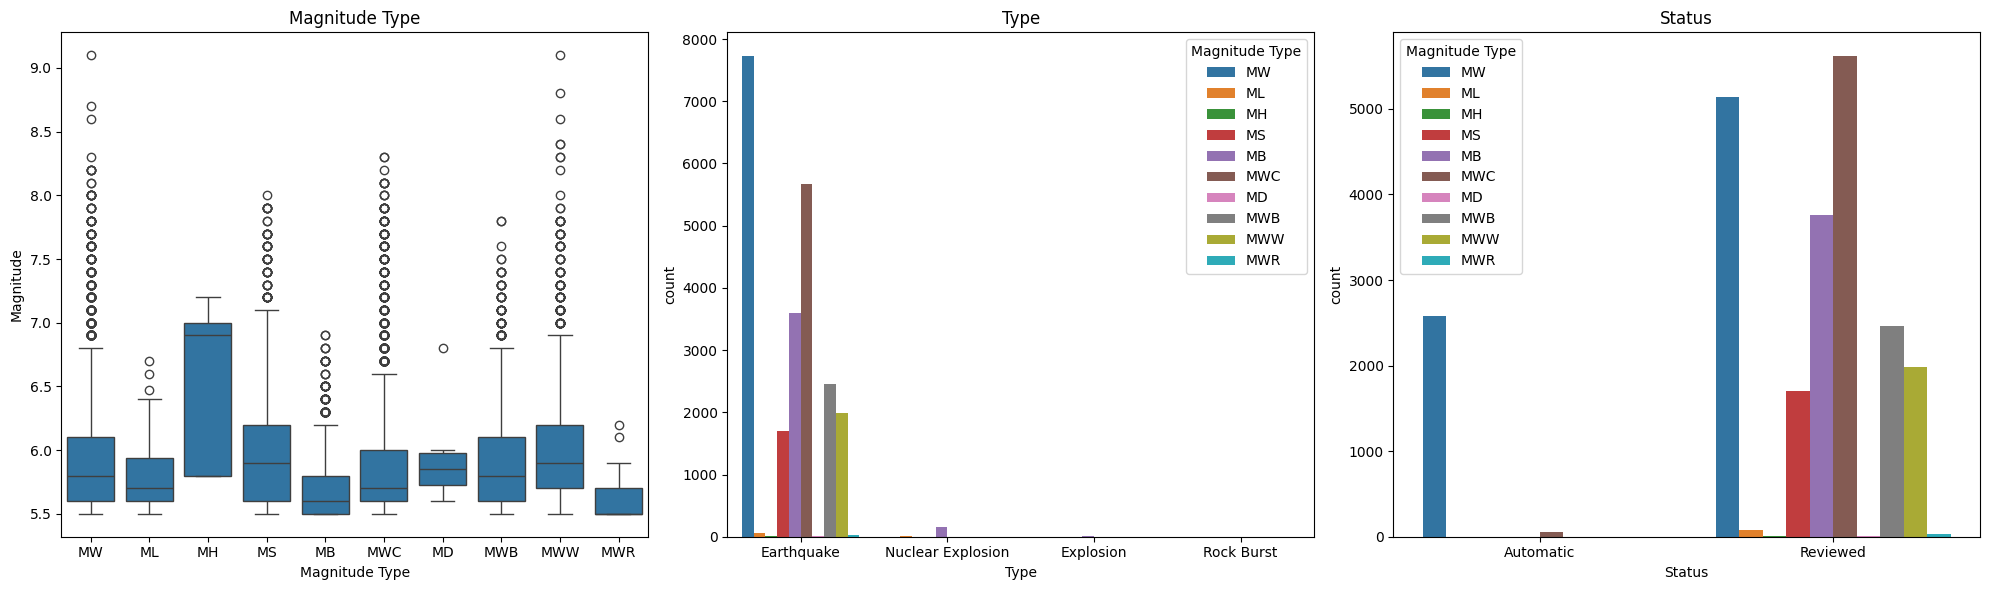

In [52]:
#Bivariate Analysis
fig, axes=plt.subplots(1,3,figsize=(20,6))
sns.boxplot(x='Magnitude Type', y='Magnitude', data=df, ax=axes[0]).set_title('Magnitude Type')
sns.countplot(x='Type', hue='Magnitude Type', data=df, ax=axes[1]).set_title('Type')
sns.countplot(x='Status', hue='Magnitude Type', data=df, ax=axes[2]).set_title('Status')
plt.tight_layout()
plt.show()

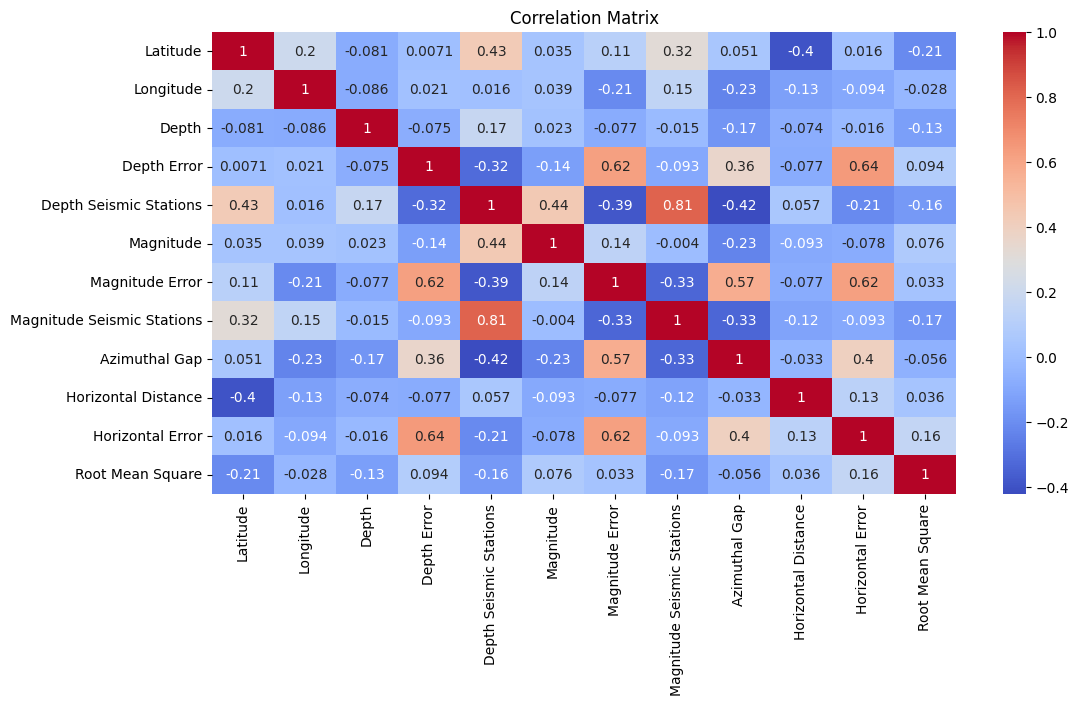

In [55]:
#Mutivariate Analysis
#correlation matrix for numerical features
plt.figure(figsize=(12,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

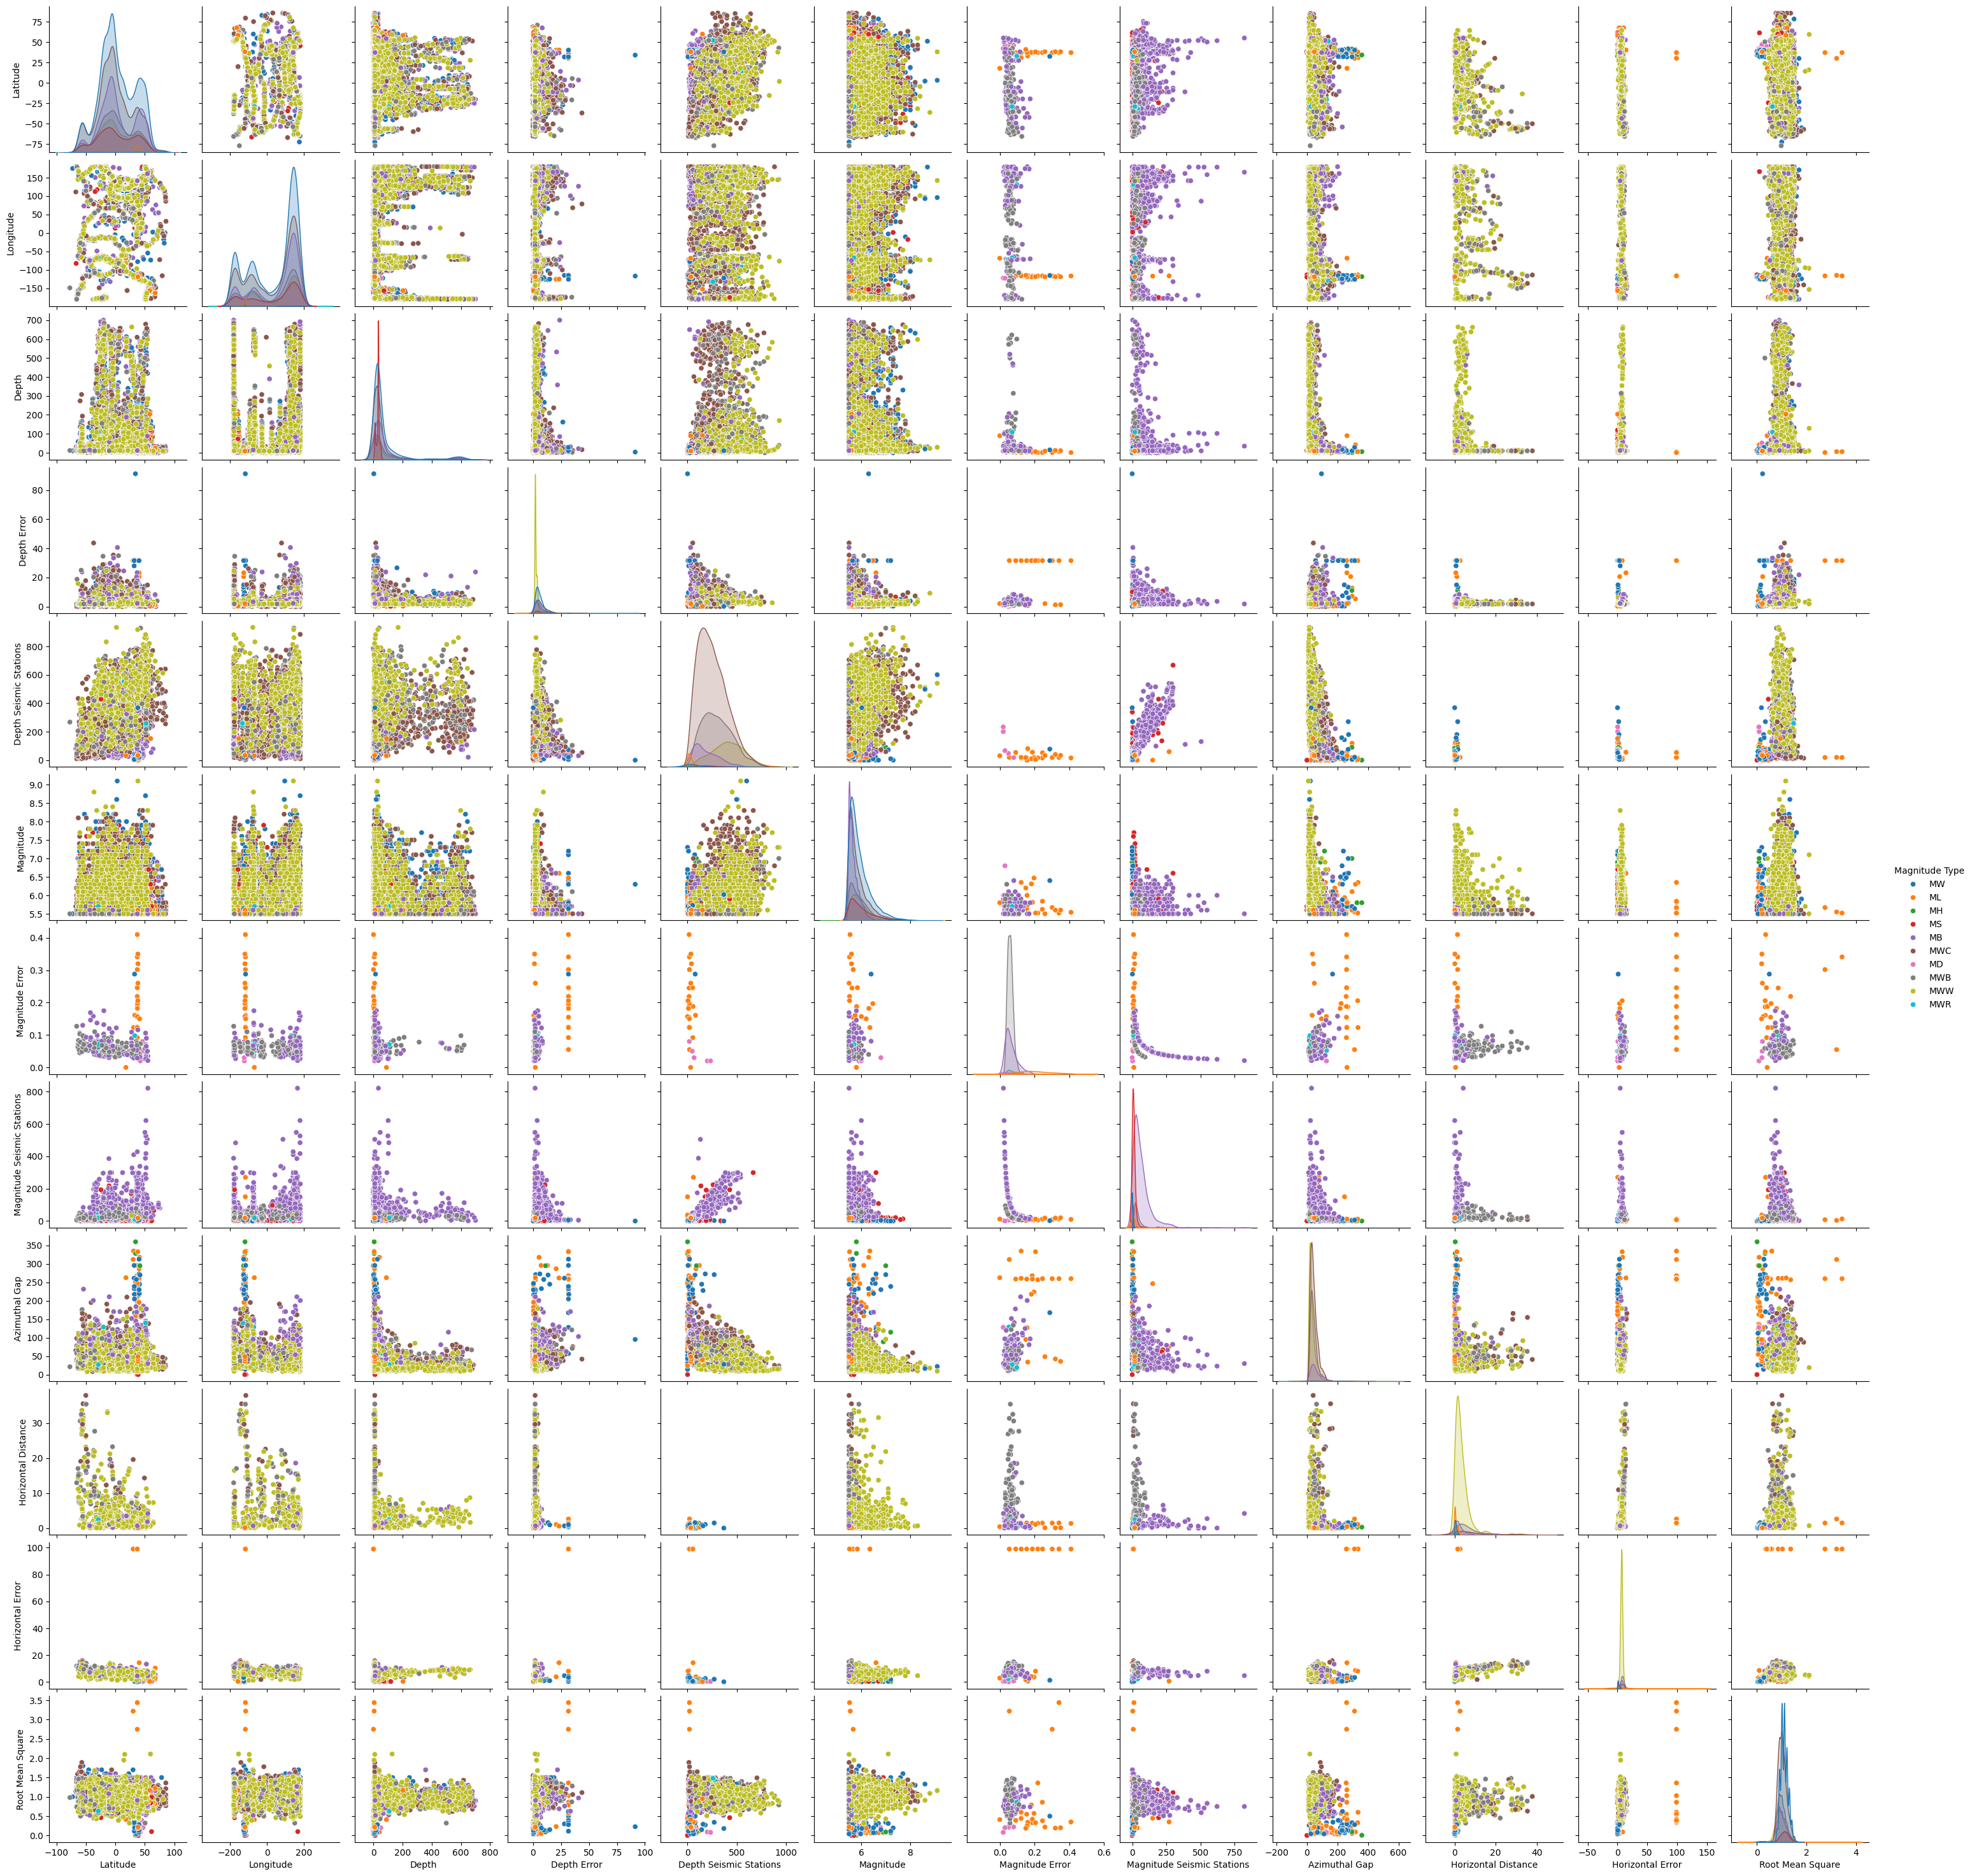

In [56]:
#Pairplot for numerical features colored by Magnitude Type
sns.pairplot(df, vars=num_cols, hue='Magnitude Type')
plt.show()

In [58]:
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [60]:
#Data Preprocessing
le=LabelEncoder()
categorical_cols=['Date','Time','ID','Source','Location Source','Magnitude Source','Magnitude Type','Status','Type']
for col in categorical_cols:
  df[col]=le.fit_transform(df[col])

In [61]:
#Feature & Target Selection
X = df.drop(['Magnitude Type'], axis=1)
y = df['Magnitude Type']

In [62]:
#Split data into training & test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
X_train.shape

(18729, 20)

In [64]:
X_test.shape

(4683, 20)

In [65]:
#Scale num features
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [68]:
X_train.head(10)

Date   Time  Latitude  Longitude  Type     Depth  Depth Error  \
18765  11300  16254  0.436500  -0.804332     0  0.706910          NaN   
21035  10202  16167 -0.537035  -0.921513     0 -0.377018          NaN   
18334   2866  11995  1.211696  -0.152755     0 -0.450923          NaN   
16776   4290  11764  1.350361   0.841042     0 -0.339245          NaN   
9152    8073  14081 -0.584284  -1.687999     0 -0.344993          NaN   
22095   2624  18352 -0.718880  -0.880279     0 -0.546834    -0.528379   
8407    2200   6102 -0.856809  -0.874759     0 -0.234958          NaN   
9016    4769  12852  0.210262  -0.621997     0 -0.491980          NaN   
15521   7952  18603 -0.170411   0.851331     0 -0.491980          NaN   
17840   3957   1471 -1.963243   0.861357     0 -0.491980          NaN   

       Depth Seismic Stations  Magnitude  Magnitude Error  \
18765                2.377939   3.603613              NaN   
21035                1.218345   2.417173              NaN   
18334                1.463761  -0.430285              NaN   
16776                1.396272  -0.904861              NaN   
9152                      NaN  -0.430285              NaN   
22095                     NaN  -0.192997              NaN   
8407                      NaN   0.518868              NaN   
9016                      NaN   0.518868              NaN   
15521               -0.290969   0.756156              NaN   
17840               -0.665229   0.518868              NaN   

       Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
18765                         NaN      -0.948056                  NaN   
21035                         NaN       0.067469                  NaN   
18334                         NaN      -0.273085                  NaN   
16776                         NaN       1.107538                  NaN   
9152                          NaN            NaN                  NaN   
22095                         NaN       1.095265            -0.539463   
8407                          NaN            NaN                  NaN   
9016                          NaN            NaN                  NaN   
15521                         NaN            NaN                  NaN   
17840                         NaN      -0.125819                  NaN   

       Horizontal Error  Root Mean Square     ID  Source  Location Source  \
18765               NaN         -1.494100  20607      11               44   
21035               NaN         -0.115410  22865      11               44   
18334               NaN               NaN  20178      11                5   
16776               NaN         -1.175941  18625      11               44   
9152                NaN         -0.645675  11077      11               44   
22095               NaN          0.945121   4353      11               44   
8407                NaN         -0.645675  10341      11               44   
9016                NaN          0.414855  10941      11               44   
15521               NaN          1.157227  17375      11               44   
17840               NaN          1.634466  19684      11               44   

       Magnitude Source  Status  
18765                20       1  
21035                20       1  
18334                20       1  
16776                20       1  
9152                 10       1  
22095                20       1  
8407                 10       1  
9016                 12       1  
15521                10       1  
17840                20       1